In [479]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-dark')

In [480]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [481]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [482]:
rr_srh=matches[((matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
rr=matches[(matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
rr_srh.shape,rr.shape,srh.shape

((20, 18), (147, 18), (183, 18))

In [483]:
rr_srhdeli=deliveries[((deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
rrdeli=deliveries[(deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
rr_srhdeli.shape,rrdeli.shape,srhdeli.shape

((4821, 21), (34674, 21), (43760, 21))

In [484]:
rr_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
67,68,2008,Hyderabad,2008-04-24,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
88,89,2008,Jaipur,2008-05-09,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,YK Pathan,Sawai Mansingh Stadium,MR Benson,AM Saheba,NaN
139,140,2009,Port Elizabeth,2009-05-02,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,3,YK Pathan,St George's Park,S Asnani,BG Jerling,NaN
154,155,2009,Kimberley,2009-05-11,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,53,0,DR Smith,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
194,195,2010,Ahmedabad,2010-03-26,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,YK Pathan,"Sardar Patel Stadium, Motera",HDPK Dharmasena,SJA Taufel,NaN


In [485]:
rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
67,68,2008,Hyderabad,2008-04-24,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
69,70,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN


In [486]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [487]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='CadetBlue')
        ax[i].set_title(columns[i])

In [488]:
rr_srh.winner.value_counts()

Rajasthan Royals       12
Sunrisers Hyderabad     8
Name: winner, dtype: int64

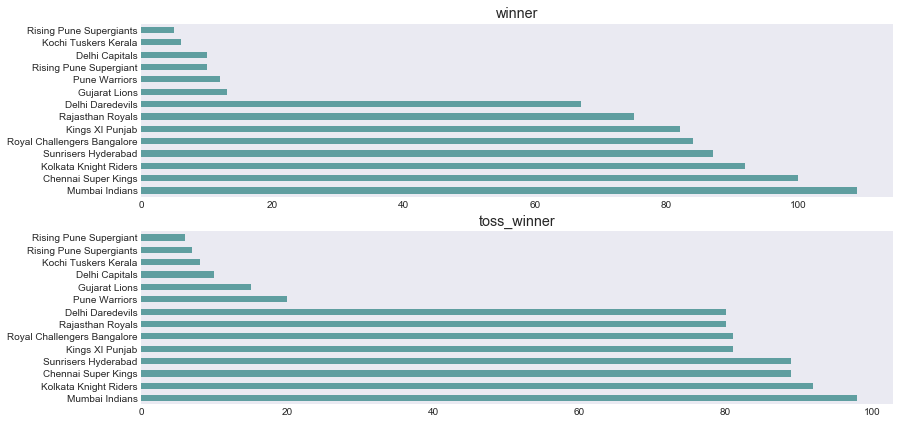

In [489]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

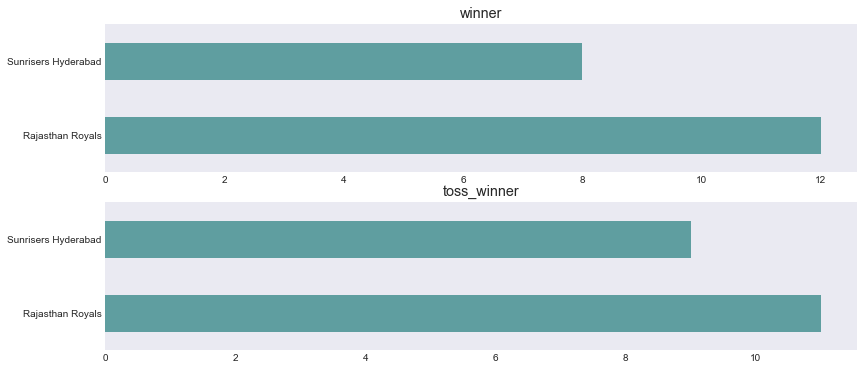

In [490]:
cat_plot(rr_srh,['winner','toss_winner'],(12,6),'barh')

### As we can see from the above analysis Rajasthan Royals are more likely to win the match

# Q2

In [491]:
import warnings
warnings.filterwarnings('ignore')

In [492]:
rkhan_srh=srhdeli[srhdeli.batsman.str.contains('Rashid Khan')].groupby('match_id')['ball','dismissal_kind'].count()
rkhan_rrsrh=rr_srhdeli[rr_srhdeli.batsman.str.contains('Rashid Khan')].groupby('match_id')['ball','dismissal_kind'].count()


In [493]:
rkhan_srh

,ball,dismissal_kind
match_id,,
10,4,1
19,1,0
43,4,1
7900,1,1
7913,4,0
7916,9,1
7921,3,1
7932,3,1
7947,1,1


In [494]:
rkhan_srh.describe()

,ball,dismissal_kind
count,17.000000,17.000000
mean,3.941176,0.705882
std,3.526163,0.469668
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,4.000000,1.000000
max,11.000000,1.000000


Text(0, 0.5, 'Frequency')

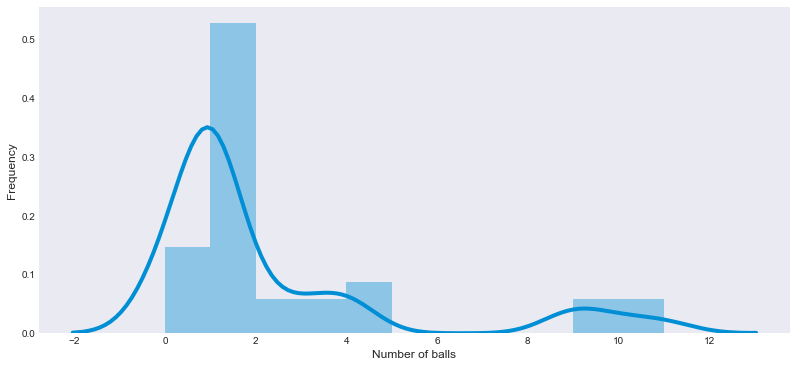

In [495]:
plt.figure(figsize=(12,6))
sns.distplot(rkhan_srh)
plt.xlabel('Number of balls')
plt.ylabel('Frequency')

In [496]:
#As this data had only 3 rows and two of them outliers so we won't take this into consideration.
rkhan_rrsrh

,ball,dismissal_kind
match_id,,
7921,3,1
11144,10,0
11336,9,0


### It's pretty evident that Rashid Khan will take 0-4 balls to get his first wicket 

# Q3

In [497]:
warner_srh=srhdeli[srhdeli.batsman.str.contains('DA Warner')].groupby(['match_id','dismissal_kind'],as_index=False).count()
warner_rrsrh=rr_srhdeli[rr_srhdeli.batsman.str.contains('DA Warner')].groupby(['match_id','dismissal_kind'],as_index=False).count()

Text(0.5, 1.0, 'Dismissal of warner against RR')

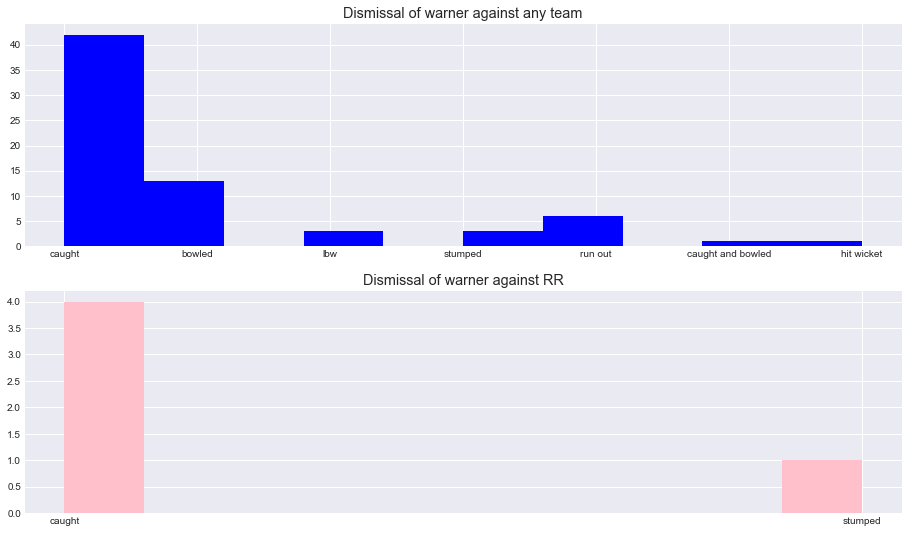

In [499]:
fig,ax=plt.subplots(figsize=(14,9),nrows=2)

ax[0].set_title('Dismissal of warner against any team')
warner_srh.dismissal_kind.hist(ax=ax[0],color='b')

warner_rrsrh.dismissal_kind.hist(ax=ax[1],color='pink',)
ax[1].set_title('Dismissal of warner against RR')

### Warner will most probably get caught out in the match

# Q4

In [500]:
rr_cont=rrdeli[rrdeli.batting_team=='Rajasthan Royals'].groupby(['match_id',
                                                         'batsman'],as_index=False).sum()
#rr_cont.batsman_runs.sort_values(ascending=False).iloc[0:40].plot.bar(figsize=(16,5))


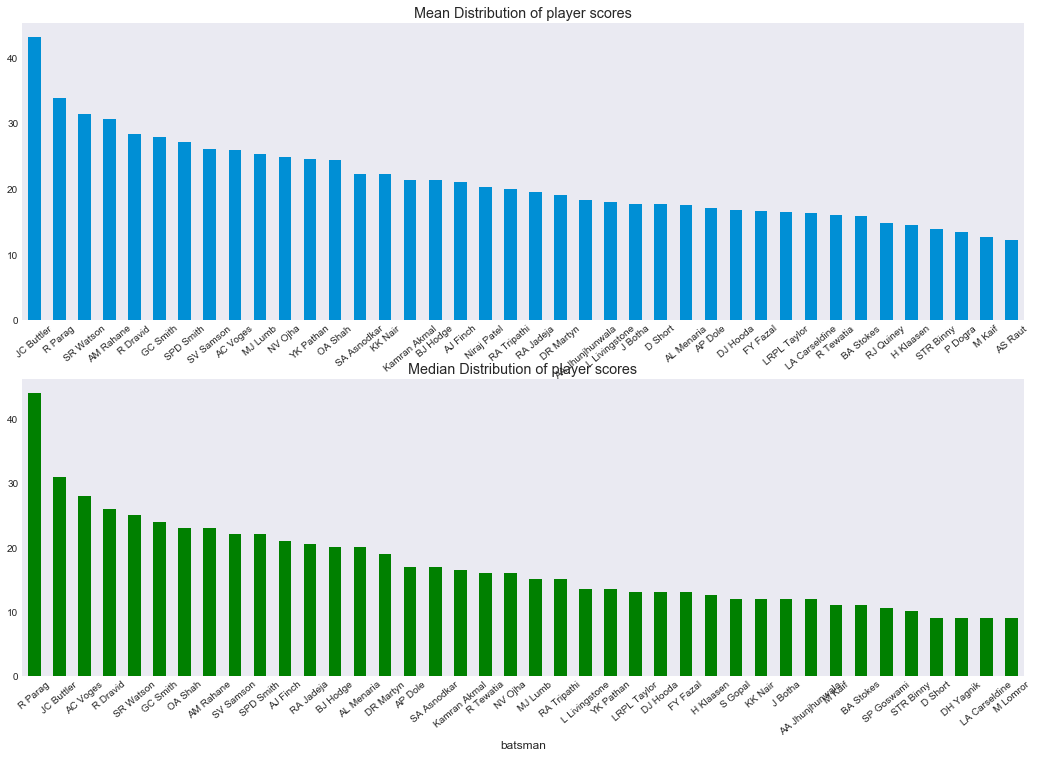

In [504]:
rr_cont_dist_mean=rr_cont.groupby('batsman').mean().batsman_runs.sort_values(ascending=False).iloc[0:40]
rr_cont_dist_median=rr_cont.groupby('batsman').median().batsman_runs.sort_values(ascending=False).iloc[0:40]

fig,ax=plt.subplots(nrows=2,figsize=(16,12))

rr_cont_dist_mean.plot.bar(ax=ax[0],rot=40,title='Mean Distribution of player scores')
rr_cont_dist_median.plot.bar(ax=ax[1],color='g',rot=40,title='Median Distribution of player scores')


### There are high chances that JC Buttler will score the most runs for RR

# Q5

Text(0.5, 1.0, 'Overall data of all matches')

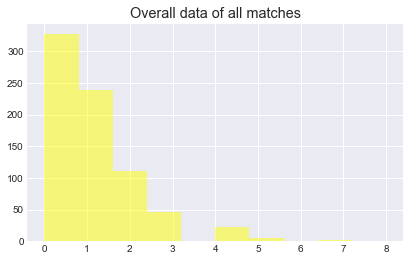

In [502]:
deliveries.groupby('match_id').sum().noball_runs.hist(color='yellow',alpha=0.5)
plt.title('Overall data of all matches')

Text(0.5, 1.0, 'SRH vs RR')

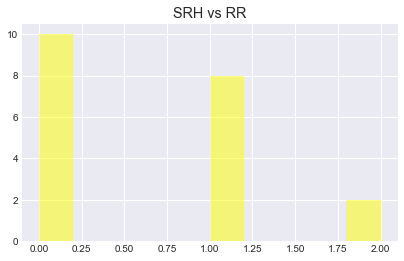

In [503]:
rr_srhdeli.groupby('match_id').sum().noball_runs.hist(color='yellow',alpha=0.5)
plt.title('SRH vs RR')

### We can assume that there will be 0-1 no balls according to the above distributions